<a href="https://colab.research.google.com/github/amine0007/Node-Classification-GCN/blob/main/node_classification_gcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 872.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)

2.6.0+cu124
12.4


In [ ]:
!pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.2 MB/s eta 0:00:00


In [ ]:
import torch_geometric
print(torch_geometric.__version__)

2.6.1


In [ ]:
from torch_geometric.datasets import Planetoid

# Loading Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]  # graph access

print(f"Nombre de nœuds: {data.num_nodes}")
print(f"Nombre d'arêtes: {data.num_edges}")
print(f"Nombre de classes: {dataset.num_classes}")
print(f"Nombre de features: {dataset.num_features}")

Nombre de nœuds: 2708
Nombre d'arêtes: 10556
Nombre de classes: 7
Nombre de features: 1433


Processing...
Done!


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    acc = (pred[data.test_mask] == data.y[data.test_mask]).sum() / data.test_mask.sum()
    return acc.item()

for epoch in range(200):
    loss = train()
    if epoch % 50 == 0:
        acc = test()
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

Epoch 000, Loss: 1.9453, Acc: 0.3220
Epoch 050, Loss: 0.0608, Acc: 0.7920
Epoch 100, Loss: 0.0451, Acc: 0.8020
Epoch 150, Loss: 0.0391, Acc: 0.8110


In [ ]:
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(200):
    # training
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_out = model(data.x, data.edge_index)
        val_loss = F.cross_entropy(val_out[data.val_mask], data.y[data.val_mask])
        val_pred = val_out.argmax(dim=1)
        val_acc = (val_pred[data.val_mask] == data.y[data.val_mask]).sum() / data.val_mask.sum()

    # Storage
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    val_accuracies.append(val_acc.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch:03d}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 000, Train Loss: 0.0439, Val Loss: 0.7836, Val Acc: 0.7700
Epoch 050, Train Loss: 0.0254, Val Loss: 0.8053, Val Acc: 0.7680
Epoch 100, Train Loss: 0.0299, Val Loss: 0.7805, Val Acc: 0.7720
Epoch 150, Train Loss: 0.0255, Val Loss: 0.8563, Val Acc: 0.7640


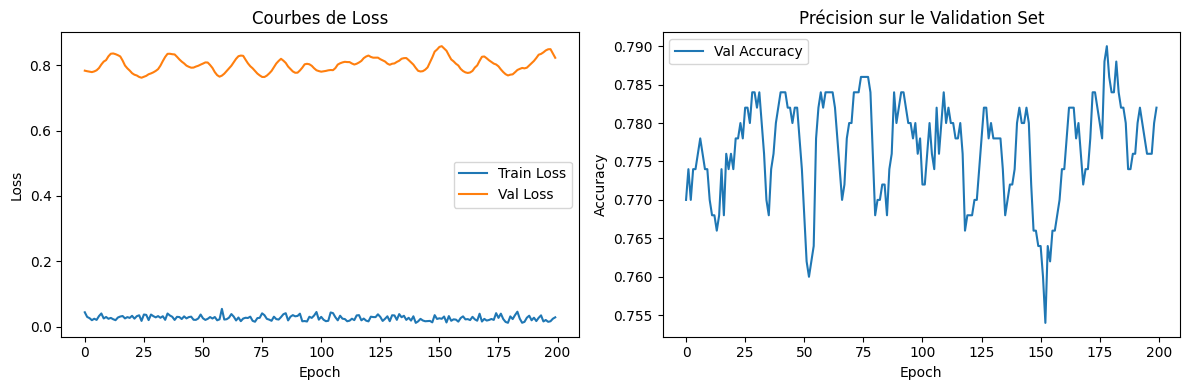

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Courbes de Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Précision sur le Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

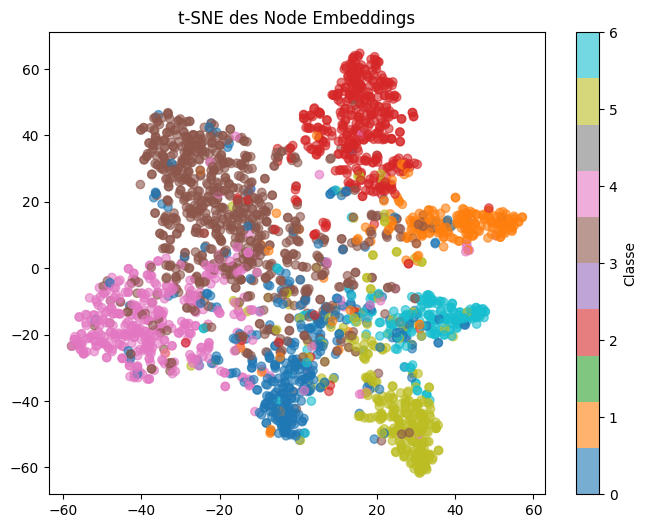

In [ ]:
from sklearn.manifold import TSNE

model.eval()
emb = model.conv1(data.x, data.edge_index).detach().cpu()

# Dimensional reduction
tsne = TSNE(n_components=2, perplexity=30)
emb_2d = tsne.fit_transform(emb)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=data.y.cpu(), cmap='tab10', alpha=0.6)
plt.title('t-SNE des Node Embeddings')
plt.colorbar(label='Classe')
plt.show()

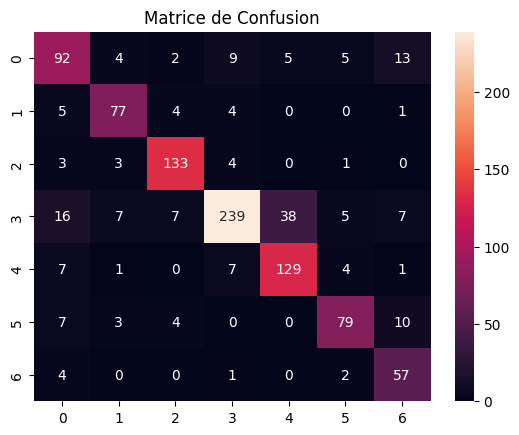

In [ ]:
model.eval()
pred = model(data.x, data.edge_index).argmax(dim=1)

# confusion Mat
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(data.y[data.test_mask].cpu(), pred[data.test_mask].cpu())
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.show()